Chicago_Crimes_2012_to_2017

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [5]:
data = pd.read_csv('./data/data.ignore.csv')
data.head()

data['Arrest'] = data['Arrest'].replace({True: 1, False: 0})
data.drop(
    [
        'Unnamed: 0',
        'Location Description',
        'Beat',
        'District',
        'ID',
        'Case Number',
        'Date',
        'Block',
        'IUCR',
        'Description',
        'Domestic',
        'Community Area',
        'FBI Code',
        'Updated On',
        'Latitude',
        'Longitude',
        'Location',        
    ],
    axis = 1,
    inplace = True
)

print(pd.DataFrame(data['Primary Type']).sample(1000))

                             Primary Type
834950                              THEFT
236814                    CRIMINAL DAMAGE
369355                            ASSAULT
682381                CRIM SEXUAL ASSAULT
1307261                           BATTERY
891317                      OTHER OFFENSE
1152187                           BATTERY
1165694                           BATTERY
1165633                             THEFT
554246                           BURGLARY
622649                            ASSAULT
258977                            ROBBERY
1376299                             THEFT
785481                 DECEPTIVE PRACTICE
342286                            ASSAULT
864688                    CRIMINAL DAMAGE
591830                           BURGLARY
1290601                     OTHER OFFENSE
1363011                     OTHER OFFENSE
1005651                DECEPTIVE PRACTICE
717882                              THEFT
1056144                         NARCOTICS
760619                          NA

In [ ]:
def get_crime_type(crime):
    
    
data['Primary Type'] = data['Primary Type'].apply(get_crime_type, axis=1)

In [ ]:
x_indexs = data[data['X Coordinate'] == 0].index
data.drop(x_indexs, inplace=True)

y_indexs = data[data['Y Coordinate'] == 0].index
data.drop(y_indexs, inplace=True)

print(data.head())

data[data == np.inf] = np.nan
data.fillna(data.mean(), inplace=True)

coord_names = ['X Coordinate', 'Y Coordinate']

training_data = stats.zscore(data[coord_names])

             Primary Type  Arrest  Ward  X Coordinate  Y Coordinate  Year
0                 BATTERY       1  24.0     1154907.0     1893681.0  2016
1                 BATTERY       0  20.0     1183066.0     1864330.0  2016
2  PUBLIC PEACE VIOLATION       0  37.0     1140789.0     1904819.0  2016
3                 BATTERY       0  28.0     1143223.0     1901475.0  2016
4                   THEFT       0  28.0     1139890.0     1901675.0  2016


now its time to cluster the actual data

In [25]:
from sklearn.cluster import KMeans
model = KMeans(
    n_clusters = 8,
    random_state = 0
)

model.fit(training_data)

# get the labels and assign to oiginal data labels
labels = model.labels_
data['clusters'] = labels

coord_names.extend(['clusters'])

coords = data[coord_names]

print(coords.groupby(['clusters']).mean())

          X Coordinate  Y Coordinate
clusters                            
0         1.174033e+06  1.863835e+06
1         1.135999e+06  1.918173e+06
2         1.151139e+06  1.901206e+06
3         1.174820e+06  1.834506e+06
4         1.191011e+06  1.851594e+06
5         1.162587e+06  1.931422e+06
6         1.170842e+06  1.898475e+06
7         1.154964e+06  1.863709e+06


Text(-21.450000000000003, 0.5, 'Y Coordinate')

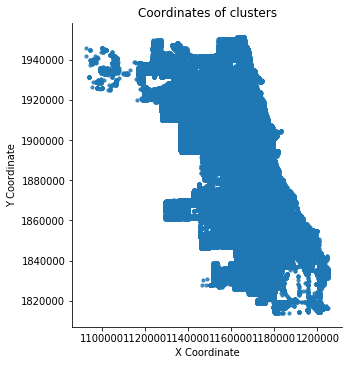

In [28]:
sns.lmplot(
    'X Coordinate', 'Y Coordinate',
    data = data,
    fit_reg = False,
    #     hue = 'clusters',
    scatter_kws = {
        'marker': 'D',
        's': 10
    }
)

plt.title('Coordinates of clusters')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')